<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-X.-Template" data-toc-modified-id="Case-X.-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case X. Template</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Modes-and-training" data-toc-modified-id="Modes-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modes and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 1
Mikko Kettunen, Sami Tanhua, Niklas Koro and Jake Pärssinen<br>
Last edited: 02.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# Background

The aim of this Notebook is to create the most simple and accurate neural network to predict if patient has a disease based on his/hers given information. 

## Imports

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from pylab import *

Populating the interactive namespace from numpy and matplotlib


# Data

The data contained we used

In [2]:
filename = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(filename, index_col = None, header = None, na_values = '?')
df = df.fillna(0)  # Replace any missing values with 0
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Data preprocessing

In [3]:
# Define input and output columns    
data = df.loc[:, 0:12]  
labels = 1.0*(df.loc[:, 13] > 0)

# Split data to train, test and validation sets 
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=1)

data_train, data_val, labels_train, labels_val = train_test_split(data_train, labels_train, test_size=0.2, random_state=1)

# Split train data for 2 models
partial_data_train = data_train[:100]
partial_labels_train = labels_train[:100]

# Featurewise normalization to mean zero and unit standard deviation.
mean = data_train.mean(axis=0)
data_train -= mean
std = data_train.std(axis=0)
data_train /= std
data_test -= mean
data_test /= std

# Modes and training

## Model 1

In [4]:
# Construct the model 1, no regularization

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(data_train.shape[1],)))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_data_train, partial_labels_train,
                    epochs=130, batch_size=64, verbose=0,
                    validation_data = (data_val, labels_val))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


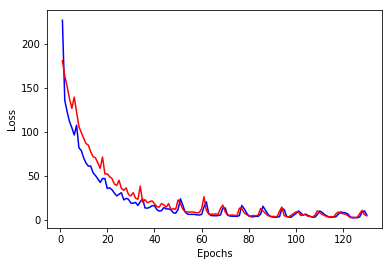

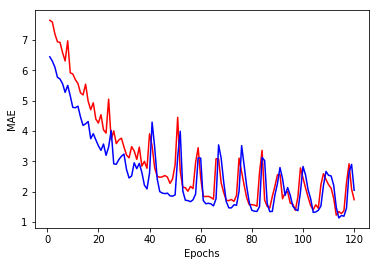

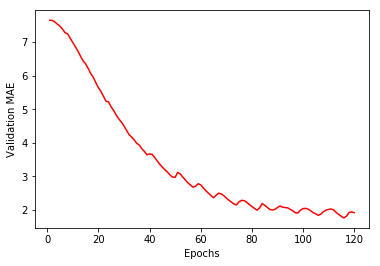

In [5]:
# Plot the loss score and mean absolute error for both training and validation sets
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

#Plotting loss graph
plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Cut off the first few MAE data points for clarity. 
# This is done because the first few values are significally bigger than other values.
short_mae = mae[10:]
short_val_mae = val_mae[10:]

#plotting MAE graph
plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Smoothen the previous curve to reduce noise
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Cut off the first few data points for clarity
smooth_val_mae = smooth_curve(val_mae[10:])

#plotting Validation MAE graph
plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [6]:
# The final evaluation with the test data.
model.fit(data_train, labels_train, epochs=130, batch_size=64, verbose=0)

# Running testing data 
test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

61/61 [==============================] - 0s 124us/sample - loss: 0.1625 - mean_absolute_error: 0.3096
Loss:  0.16250470182934745 Test mae score 0.3096239


## Model 2

In [16]:
# Construct the model
# Model with L2 regularization

model = Sequential()
# Constructing layer with regularizer L2
model.add(Dense(50, kernel_regularizer=regularizers.l2(0.5), activation='relu', input_shape=(data_train.shape[1],)))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_data_train, partial_labels_train,
                    epochs=500, batch_size=64, verbose=0,
                    validation_data = (data_val, labels_val))

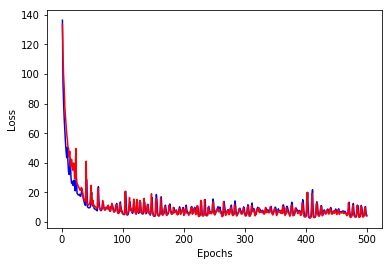

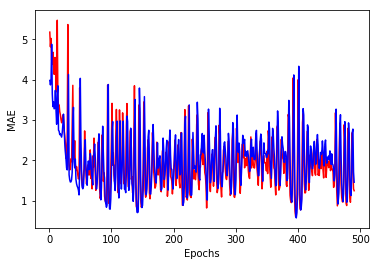

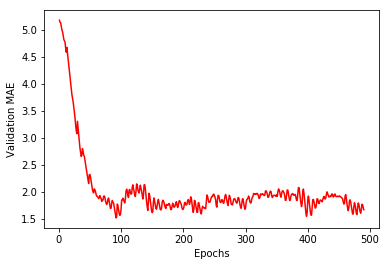

In [17]:
# Plot the loss score and mean absolute error for both training and validation sets
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

#Plotting loss graph
plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Cut off the first few MAE data points for clarity
short_mae = mae[10:]
short_val_mae = val_mae[10:]

#Plotting MAE graph
plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Smoothen the previous curve to reduce noise
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Cut off the first few data points for clarity
smooth_val_mae = smooth_curve(val_mae[10:])

#Plotting Validation MAE graph
plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [18]:
# The final evaluation with the test data.
model.fit(data_train, labels_train, epochs=500, batch_size=64, verbose=0)

# Running testing data 
test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

61/61 [==============================] - 0s 152us/sample - loss: 0.1355 - mean_absolute_error: 0.2626
Loss:  0.13551866959352962 Test mae score 0.26257497


## Model 3

In [10]:
# Construct the model
# Model with dropout
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(data_train.shape[1],)))
# Adding dropout layer 
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_data_train, partial_labels_train,
                    epochs=500, batch_size=64, verbose=0,
                    validation_data = (data_val, labels_val))

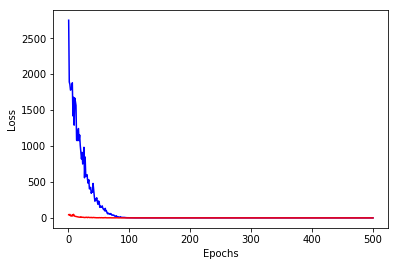

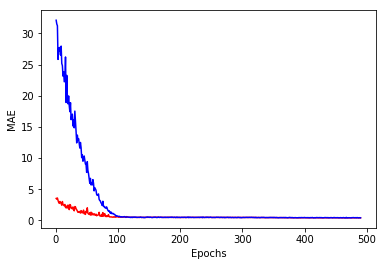

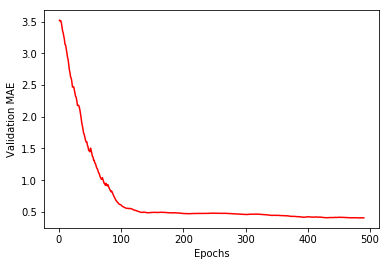

In [11]:
# Plot the loss score and mean absolute error for both training and validation sets
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

#Plotting loss graph
plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# Cut off the first few MAE data points for clarity
short_mae = mae[10:]
short_val_mae = val_mae[10:]

#Plotting MAE graph
plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Smoothen the previous curve to reduce noise
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Cut off the first few data points for clarity
smooth_val_mae = smooth_curve(val_mae[10:])

#Plotting MAE graph
plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [12]:
# The final evaluation with the test data.
model.fit(data_train, labels_train, epochs=500, batch_size=64, verbose=0)

# Running testing data 
test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

61/61 [==============================] - 0s 167us/sample - loss: 0.1397 - mean_absolute_error: 0.2896
Loss:  0.13973408644316626 Test mae score 0.28962559


# Results and Discussion

The following results were achieved ...

Model 1
1. We used mean squared error and mean absolute error to estimate our neural networks accuracy on predicting the outcomes.
2. We tried training the network with different batch sizes, epoch numbers, layer numbers and dense network numbers.
3. We found out that the best combination was to use 64 batch size, 130 epochs, 50 layers and 1 dense network.
4. With this combination we achieved mse score of 0.17 and mae score of 0.32.
5. Adding dense network numbers increased the accuracy too little, so we chose to use the simpler 1 dimensional network for it's best combination of accuracy and simplicity.

Model 2
1. We tried training the network with different L2 values, batch sizes, epoch numbers, layer numbers and dense network numbers.
2. We found out that the best combination was to use 0.5 L2 value, 64 batch size, 500 epochs, 50 layers and 1 dense network.
3. With this combination we achieved mse score of 0.13 and mae score of 0.25, which is better than the model with no regularization.

Model 3
1. We tried training the network with different dropout values, batch sizes, epoch numbers, layer numbers and dense network numbers.
2. We found out that the best combination was to use 0.5 dropout value, 64 batch size, 500 epochs, 50 layers and 1 dense network.
3. With this combination we achieved mse score of 0.13 and mae score of 0.29, which is better than the model 1, but worse than the model 2.

# Conclusions

To summarize we found out that using a neural network model with L2 regularization and the specs we told above, gave us the most accurate predictions on this dataset. With this dataset, the best solution was a simple neural network, adding complexity didn't improve the results significally. We noticed also that with smaller batch sizes the model was overfitting. With a batch size of 64 no overfitting was occured. The 3 models we used produced similar results, the difference between accuracy was little.